In [3]:
import string
import numpy  as np
import random 
from glob import glob
import os 
from os.path import join 
##
import torch 
import torch.nn as nn 
import unicodedata 


In [4]:
## Training Varialble

device=('cuda' if torch.cuda.is_available() else "cpu")

In [5]:
data_dire='../data/chat_gen_data/'
all_letters = string.ascii_lowercase ## We will use this to give ids to each letter 
sos_index=len(all_letters)
eos_index=len(all_letters)+1
unk_index=len(all_letters)+2
n_letters = len(all_letters) + 3 # Plus SOO,EOS, and UNK marker

### Understanding the preprocessing task 

#### Cleaning the dataset

In [6]:
### let is open one of the text files "English.txt" to see what the names looks like 
## we get names like this 
with open(join(data_dire,'names','English.txt')) as f:
    for line in f:
        print(line.strip()) ##strips char like '\n'

Abbas
Abbey
Abbott
Abdi
Abel
Abraham
Abrahams
Abrams
Ackary
Ackroyd
Acton
Adair
Adam
Adams
Adamson
Adanet
Addams
Adderley
Addinall
Addis
Addison
Addley
Aderson
Adey
Adkins
Adlam
Adler
Adrol
Adsett
Agar
Ahern
Aherne
Ahmad
Ahmed
Aikman
Ainley
Ainsworth
Aird
Airey
Aitchison
Aitken
Akhtar
Akram
Alam
Alanson
Alber
Albert
Albrighton
Albutt
Alcock
Alden
Alder
Aldersley
Alderson
Aldred
Aldren
Aldridge
Aldworth
Alesbury
Alexandar
Alexander
Alexnader
Alford
Algar
Ali
Alker
Alladee
Allam
Allan
Allard
Allaway
Allcock
Allcott
Alldridge
Alldritt
Allen
Allgood
Allington
Alliott
Allison
Allkins
Allman
Allport
Allsop
Allum
Allwood
Almond
Alpin
Alsop
Altham
Althoff
Alves
Alvey
Alway
Ambrose
Amesbury
Amin
Amner
Amod
Amor
Amos
Anakin
Anderson
Andersson
Anderton
Andrew
Andrews
Angus
Anker
Anley
Annan
Anscombe
Ansell
Anstee
Anthony
Antic
Anton
Antony
Antram
Anwar
Appleby
Appleton
Appleyard
Apsley
Arah
Archer
Ardern
Arkins
Armer
Armitage
Armour
Armsden
Armstrong
Arnall
Arnett
Arnold
Arnott
Arrowsmith
Arscott

FIrst step is to `standarise or normalise` the text according to unicode format. We will check for each of the character in the above sentence for this. 

In order to achieve this we cam use: unicode.normalize("NFD","string"); 

The above function will return "normalised_string". *However, not that visually, when print(), boih
original string and normalized_string looks same.* However, they are not same. As shown in below example:

In [7]:
import unicodedata

s = "héllò"
normalized_s = unicodedata.normalize('NFD', s) ##standarise each text 
print(f's: {s} |normalized_s: {normalized_s}') ## looks same
 ## Although both of the text looks same, normalised_s is standaries ; since characters can have multiple representation
 #because of factors such as diacritics

s==normalized_s

s: héllò |normalized_s: héllò


False

Next, we wanna make sure that each character are not NonSpacing character (characters that are used in 
a combination with preceding characters to modify their appearance). Example. in above sentence we don't wanna include "é,ò". We can filter that using :`unicodedata.category(c) =='Mn': 

Lastly, we wanna make sure that each character are in above defined `all_letters`

Example code below 

In [8]:
for c in normalized_s:
    
    print(f'{c}: {unicodedata.category(c)}') ## Here we can see Mn character ## wqe will remove it
       

h: Ll
e: Ll
́: Mn
l: Ll
l: Ll
o: Ll
̀: Mn


In [9]:
## Putting the Preprocessing alltogether 

def unicodeToAscii(s): ## s will be string such as "Ronaldo"
    s=s.lower()
    return ''.join( ## join is used to join iterable exam: ''.join(['A','G'])==>'AG'
        c for c in unicodedata.normalize('NFD', s) 
        if unicodedata.category(c) != 'Mn'
        and c in all_letters ##also remove small characters
    )

## Creating the dataset

In [10]:
# Read a file and split into lines
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        
        
        return [unicodeToAscii(line.strip()) for line in some_file]

In [11]:
filename=glob(join(data_dire,'names','*.txt'))[0]

In [12]:
readLines(filename) ## we have a list of names from a text files (names are preprocessed)

['khoury',
 'nahas',
 'daher',
 'gerges',
 'nazari',
 'maalouf',
 'gerges',
 'naifeh',
 'guirguis',
 'baba',
 'sabbagh',
 'attia',
 'tahan',
 'haddad',
 'aswad',
 'najjar',
 'dagher',
 'maloof',
 'isa',
 'asghar',
 'nader',
 'gaber',
 'abboud',
 'maalouf',
 'zogby',
 'srour',
 'bahar',
 'mustafa',
 'hanania',
 'daher',
 'tuma',
 'nahas',
 'saliba',
 'shamoon',
 'handal',
 'baba',
 'amari',
 'bahar',
 'atiyeh',
 'said',
 'khouri',
 'tahan',
 'baba',
 'mustafa',
 'guirguis',
 'sleiman',
 'seif',
 'dagher',
 'bahar',
 'gaber',
 'harb',
 'seif',
 'asker',
 'nader',
 'antar',
 'awad',
 'srour',
 'shadid',
 'hajjar',
 'hanania',
 'kalb',
 'shadid',
 'bazzi',
 'mustafa',
 'masih',
 'ghanem',
 'haddad',
 'isa',
 'antoun',
 'sarraf',
 'sleiman',
 'dagher',
 'najjar',
 'malouf',
 'nahas',
 'naser',
 'saliba',
 'shamon',
 'malouf',
 'kalb',
 'daher',
 'maalouf',
 'wasem',
 'kanaan',
 'naifeh',
 'boutros',
 'moghadam',
 'masih',
 'sleiman',
 'aswad',
 'cham',
 'assaf',
 'quraishi',
 'shalhoub',
 '

In [13]:
# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in glob(join(data_dire,'names','*.txt')):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

In [14]:
category_lines.keys()

dict_keys(['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese'])

In [15]:
print(all_categories)

['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


In [16]:
##
n_categories=len(all_categories)


In [17]:
category_lines

{'Arabic': ['khoury',
  'nahas',
  'daher',
  'gerges',
  'nazari',
  'maalouf',
  'gerges',
  'naifeh',
  'guirguis',
  'baba',
  'sabbagh',
  'attia',
  'tahan',
  'haddad',
  'aswad',
  'najjar',
  'dagher',
  'maloof',
  'isa',
  'asghar',
  'nader',
  'gaber',
  'abboud',
  'maalouf',
  'zogby',
  'srour',
  'bahar',
  'mustafa',
  'hanania',
  'daher',
  'tuma',
  'nahas',
  'saliba',
  'shamoon',
  'handal',
  'baba',
  'amari',
  'bahar',
  'atiyeh',
  'said',
  'khouri',
  'tahan',
  'baba',
  'mustafa',
  'guirguis',
  'sleiman',
  'seif',
  'dagher',
  'bahar',
  'gaber',
  'harb',
  'seif',
  'asker',
  'nader',
  'antar',
  'awad',
  'srour',
  'shadid',
  'hajjar',
  'hanania',
  'kalb',
  'shadid',
  'bazzi',
  'mustafa',
  'masih',
  'ghanem',
  'haddad',
  'isa',
  'antoun',
  'sarraf',
  'sleiman',
  'dagher',
  'najjar',
  'malouf',
  'nahas',
  'naser',
  'saliba',
  'shamon',
  'malouf',
  'kalb',
  'daher',
  'maalouf',
  'wasem',
  'kanaan',
  'naifeh',
  'boutro

In [18]:
## So we can there are a bunch of names (English on the above files)

from torch.utils.data import Dataset,random_split
import random
from random import shuffle

In [19]:
seed=101
random.seed(seed)

In [20]:
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor


In [21]:
def name2token(line):
    n_tokens=len(line)+2
    char_tokens=[0]*n_tokens

    # char_tokens=torch.zeros(size=(n_tokens,),)
    char_tokens[0]='<sos>'
    char_tokens[-1]='<eos>'
    char_tokens[1:-1]=list(line)
    return char_tokens
    

In [22]:
tokens=name2token(line)
print(tokens)

['<sos>', 'Z', 'a', 'o', 'u', 'i', '\n', '<eos>']


In [23]:
def token2ids(char_tokens):
    num_tokens=len(char_tokens)
    char_ids=torch.zeros(size=(num_tokens,))
    char_ids[0]=sos_index
    char_ids[-1]=eos_index
    char_ids[1:-1]=torch.tensor([all_letters.find(l) for l in char_tokens[1:-1]])
    char_ids=torch.where(char_ids==-1,unk_index,char_ids)
    return char_ids

In [24]:
def InputTensor(line): ## updated this code and we will use the Embedding layer later instead of one-hot-encod
    char_tokens=name2token(line)
    
    ids=token2ids(char_tokens)[:-1] ## wont take the last tokens
    
    # input_tensor=torch.zeros(size=(len(ids),1,n_letters),dtype=torch.int32)

    # for i in range(len(ids)):
        
    #     char_id=int(ids[i])
        

    #     input_tensor[i][0][char_id]=1
    return ids.to(dtype=torch.int64)



def TargetTensor(line):
    char_tokens=name2token(line)
    ids=token2ids(char_tokens)[1:]

    return ids.to(dtype=torch.int64) ## wont take the last tokens

In [25]:
class NameDataset(Dataset):

    def __init__(self,category_lines=category_lines):
        self.category_lines=category_lines
        self.dataset=self.get_dataset_list()
        shuffle(self.dataset)


    
    def __len__(self):
        return len(self.dataset)
    
    def get_dataset_list(self):
        return [[key,name] for key,value in self.category_lines.items() for name in value]
    


    


    def __getitem__(self, index):
        category,line=self.dataset[index]
        category_tensor=categoryTensor(category)
        input_tensor=InputTensor(line)
        target_tensor=TargetTensor(line)
        return category_tensor,input_tensor,target_tensor

In [26]:
dataset=NameDataset()

In [27]:
# dataset_len=len(dataset)
# train_len=int(0.7*dataset_len)
# val_len=int(0.15*dataset_len)
# test_len=dataset_len-train_len-val_len

In [28]:
# train_dataset,val_dataset,test_dataset=random_split(dataset,[train_len,val_len,test_len])


In [29]:
from torch.utils.data import DataLoader

In [30]:
batch_size=1
train_dataloader=DataLoader(dataset,
                             batch_size=batch_size,
                             shuffle=True)

# test_dataloader=DataLoader(test_dataset,
#                              batch_size=batch_size,
#                              shuffle=False)

# val_dataloader=DataLoader(val_dataset,
#                              batch_size=batch_size,
#                              shuffle=False)

In [31]:
for cTensor,iTensor,tTensor in train_dataloader:
    break

In [32]:
cTensor.shape

torch.Size([1, 1, 18])

In [34]:
iTensor.shape

torch.Size([1, 7])

In [36]:
iTensor[:,0][None,].shape

torch.Size([1, 1])

In [37]:
class lstm_char_gen(nn.Module):

    def __init__(self,embedding_dim,hidden_size,output_size,num_lstm_layers=2):
        super(lstm_char_gen,self).__init__()
        self.embedding_dim=embedding_dim
        self.hidden_size=hidden_size
        self.output_size=output_size

       
        self.num_lstm_layers=num_lstm_layers

        self.embedding_layer=nn.Embedding(num_embeddings=n_letters,embedding_dim=self.embedding_dim)
        self.layer_norm=nn.LayerNorm(normalized_shape=embedding_dim)
        self.lstm_layer=nn.LSTM(input_size=embedding_dim,
                                hidden_size=self.hidden_size,
                                batch_first=True,
                                num_layers=self.num_lstm_layers)
        
        self.catdim2embdim=nn.Linear(n_categories,embedding_dim)

        self.h2o=nn.Linear(self.hidden_size,self.output_size)
        
        
    def forward(self,category_tensor,input_tensor,h_i,c_i):
        category_tensor=self.catdim2embdim(category_tensor)
        
        input_tensor=self.embedding_layer(input_tensor)
        combined_input=torch.cat((category_tensor,input_tensor),dim=1)

        combined_input=self.layer_norm(combined_input)

        output,(h_i,c_i)=self.lstm_layer(combined_input,(h_i,c_i))
        output=output[:,-1,:] ## take output from the last layer only 
        output=self.h2o(output)
        output=output[None,] ##batching again
        output=nn.Dropout(0.4)(output)
        return output, h_i,c_i


    def initHidden(self):
        return (torch.zeros(size=(self.num_lstm_layers,batch_size,self.hidden_size)),
                torch.zeros(size=(self.num_lstm_layers,batch_size,self.hidden_size)))

Testing the model

In [38]:
model=lstm_char_gen(embedding_dim=256,
                    hidden_size=64,
                    output_size=n_letters)

In [39]:
h_i,c_i=model.initHidden()

In [40]:
output,_,_=model(cTensor,iTensor[0][None,],h_i,c_i)

In [41]:
output.shape

torch.Size([1, 1, 29])

In [48]:
embedding_dim=64
hidden_size=256
rnn=lstm_char_gen(embedding_dim=embedding_dim,
                  hidden_size=hidden_size,
                  output_size=n_letters
                  ).to(device)

In [49]:
lr=0.001
criterion=nn.CrossEntropyLoss().to(device)
optimizer=torch.optim.Adam(rnn.parameters(),lr=lr)

/home/akash/anaconda3/envs/vision/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
len(train_dataloader)

20074

In [51]:
## We will do the training 
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [68]:
def train(dataloader,optimizer,criterion,rnn,device):
    rnn.train()
    
   
    
    avg_losses = []

    for data_idx, (category_tensor, input_tensor, target_tensor) in enumerate(dataloader):
        loss = torch.tensor([0]).to(device, dtype=torch.float32)
        category_tensor = category_tensor.to(device)
        input_tensor = input_tensor.to(device)
        target_tensor = target_tensor.to(device)
        
        optimizer.zero_grad()
        
        # Update hidden states at the beginning of each sequence
        h_i, c_i = rnn.initHidden()  
        h_i = h_i.to(device)
        c_i = c_i.to(device)

        for idx in range(len(input_tensor)):
            inp=input_tensor[:, idx][None,]
            tar=target_tensor[:, idx][None,]
            
            predicted_text, h_i, c_i = rnn(category_tensor,inp , h_i, c_i)
            l = criterion(predicted_text.view(-1,n_letters),tar.view(-1) )
            loss += l

        # Backpropagate the total loss over the sequence

        
        loss.backward()
        optimizer.step()

        avg_losses.append(loss.item()/input_tensor.shape[1])

    return np.mean(avg_losses)


In [69]:
iTensor[:,0][None,].shape

torch.Size([1, 1])

In [70]:
tTensor[:,0][None,].shape

torch.Size([1, 1])

In [71]:
embedding_dim=64
hidden_size=256
rnn=lstm_char_gen(embedding_dim=embedding_dim,
                  hidden_size=hidden_size,
                  output_size=n_letters,
                  num_lstm_layers=1
                  ).to(device)

In [72]:
tTensor[:,0][None,].view(-1).shape

torch.Size([1])

In [74]:
epochs = 5
print_every = 5000
plot_every = 1
all_losses = []
total_loss = 0 # Reset every ``plot_every`` ``iters``

start = time.time()

for epoch in range(1, epochs + 1):
    
    loss = train(dataloader=train_dataloader,
                 optimizer=optimizer,
                 rnn=rnn,
                 criterion=criterion,
                 device=device)
    total_loss += loss

    
    print('%s (%d %d%%) %.6f' % (timeSince(start), epoch, epoch / epochs * 100, loss))

    if epoch % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

1m 19s (1 20%) 0.441899
2m 41s (2 40%) 0.442013
3m 57s (3 60%) 0.441940
5m 9s (4 80%) 0.441957
6m 22s (5 100%) 0.441889


In [75]:
import matplotlib.pyplot as plt

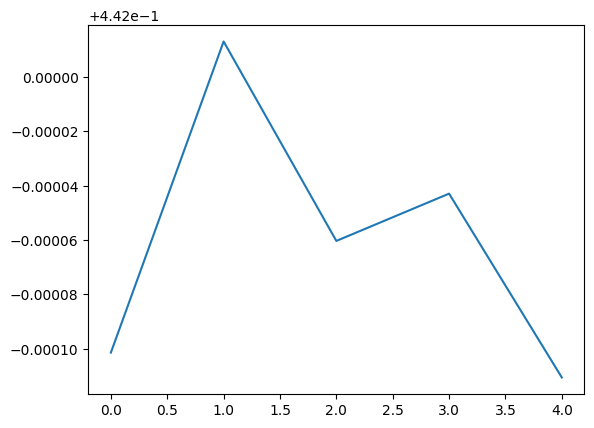

In [76]:
plt.plot(all_losses) ### does not look very good

In [77]:
save_dire='../saved_model/lstm_text_generation.pt'

In [78]:
torch.save(rnn.state_dict(),save_dire)

In [334]:
model=rnn
masked_idxs=[sos_index,unk_index]
temperature=1.0

start_text='A'
model.eval()
generated_text=unicodeToAscii(start_text)
category_tensor=categoryTensor(category).to(device)[None,]
input_tensor=InputTensor(start_text).to(device)[None,]
num_tokens=int(input_tensor.shape[1])
# print(f'cat_ten.shape: {category_tensor.shape}')
# print(input_tensor.shape)
# print(input_tensor[0])

h_i,c_i=model.initHidden()
h_i=h_i.to(device)
c_i=c_i.to(device)
mask_tensor=torch.zeros((1,1,n_letters)).to(device)
for masked_idx in masked_idxs:
    mask_tensor[0][0][masked_idx]=float('-inf')


for i in range(num_tokens): ##updating the hidden 

    predicted_logits,h_i,c_i=model(category_tensor,input_tensor[:,i],h_i,c_i)

    predicted_logits_masked=predicted_logits+mask_tensor

    predicted_logits_masked/=temperature ## increasing the randomness of predicted text

    prediction=torch.softmax(predicted_logits_masked,dim=-1)

    _,predicted_id=prediction.topk(1)

    if predicted_id ==eos_index:
        print('Predicted <eos> while updating hidden from given text.')
        break

In [128]:
def sample_generation(model,category,max_length,masked_idxs=[sos_index,unk_index],start_text='A',temperature=0.75):


    if  not category in all_categories:
        print(f'model is not trained for : {category}.') 
        return
    
    model.eval()
    generated_text=unicodeToAscii(start_text)
    category_tensor=categoryTensor(category).to(device)[None,]
    input_tensor=InputTensor(start_text).to(device)[None,]
    num_tokens=int(input_tensor.shape[1])
    ##
    # print(f'cat_ten.shape: {category_tensor.shape}')
    # print(input_tensor.shape)
    # print(input_tensor[0])
    
    h_i,c_i=model.initHidden()
    h_i=h_i.to(device)
    c_i=c_i.to(device)
    mask_tensor=torch.zeros((1,1,n_letters)).to(device)
    for masked_idx in masked_idxs:
        mask_tensor[0][0][masked_idx]=float('-inf')

    ##create mask to prevent 'unk' from generation

   

    

    for i in range(num_tokens): ##updating the hidden 

        # if i==0:
        #     print(input_tensor[:,i][None,].shape)
            

        predicted_logits,h_i,c_i=model(category_tensor,input_tensor[:,i][None,],h_i,c_i)

        predicted_logits=predicted_logits+mask_tensor

        predicted_logits/=temperature ## increasing the randomness of predicted text

        prediction=torch.softmax(predicted_logits,dim=-1)

        predicted_id=torch.argmax(prediction,dim=-1)

        if predicted_id ==eos_index:
            print('Predicted <eos> while updating hidden from given text.')
            return generated_text
        
        



    
    # print(category_tensor.shape)
    # print(predicted_id.shape)
    for i in range(max_length):


        predicted_logits,h_i,c_i=model(category_tensor,predicted_id,h_i,c_i)

        predicted_logits=predicted_logits+mask_tensor

        predicted_logits/=temperature ## increasing the randomness of predicted text

        prediction=torch.softmax(predicted_logits,dim=-1)

        predicted_id=torch.argmax(prediction,dim=-1)

        if predicted_id ==eos_index:
            print('Predicted <eos>')
            return generated_text
        
       
        else:    
            predicted_char=all_letters[predicted_id]
            generated_text+=predicted_char
            

        
    return generated_text






            




    


In [129]:
output.shape

torch.Size([1, 1, 29])

In [140]:
generated_text=sample_generation(model=rnn,
                                 category='English',
                                 max_length=20,
                                 start_text='C',
                                 temperature=1.0)

Predicted <eos>


In [141]:
generated_text

'c'